# Exploratory Data Analysis with Haberman Survival Data

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical):
 If a woman diagnosed with breast cancer has node-positive disease, it means that their  cancer   has spread from their original breast tumor to the underarm lymph nodes on the side of their   breast cancer.
* Survival status (class attribute) 
 
 1 = the patient survived 5 years or longer=YES 
 
 2 = the patient died within 5 years=NO


## Objective
Classify the patient based on their survival after 5 years of treatment given the age of patient at the time of operation, year of treat and number of positive lymph notes during breast cancer.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Reading the data set

In [6]:
data=pd.read_csv('haberman.csv',header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

Finding shape of data

In [7]:
print(data.shape)

(306, 4)


What are the columns names of data?

In [8]:
print(data.columns)

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')


In [63]:
print(data.head(5))

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


How many values of each class among 1 and 2 are present?

In [68]:
data.survival_status_after_5_years.replace([1,2],["yes","no"],inplace=True)
data["survival_status_after_5_years"].value_counts()

yes    225
no      81
Name: survival_status_after_5_years, dtype: int64

Since the two values are not the same it is imbalanced data set

## Scatter plot

Plotting scatter plot using age and year of treatment with seaborn

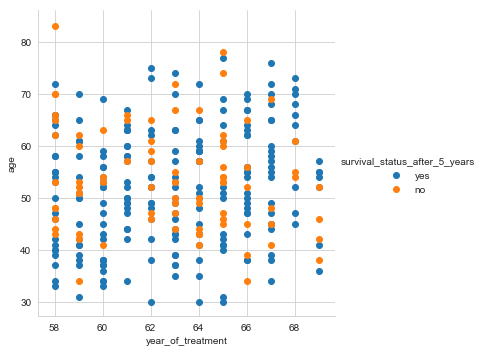

In [69]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='survival_status_after_5_years',size=5)\
   .map(plt.scatter, 'year_of_treatment','age')\
   .add_legend()
plt.show()

### Observation:
1.We are not able to distinguish the status of survival using two paremeters age and year of treatment

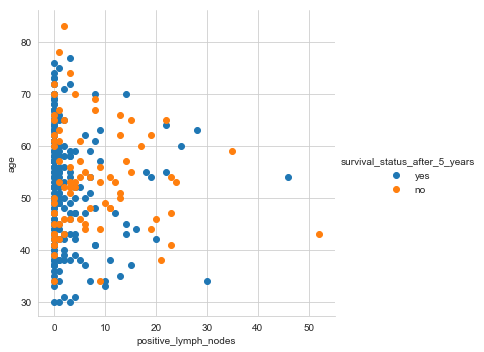

In [70]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='survival_status_after_5_years',size=5)\
   .map(plt.scatter, 'positive_lymph_nodes','age')\
   .add_legend()
plt.show()

### Observation:
1. The scatter plot of age Vs positive lymph notes also does not give any classification
2. Only we can visually see that all ages of people have mostly positive lymph notes less than  10. We will get actual parameters when we do histograms.

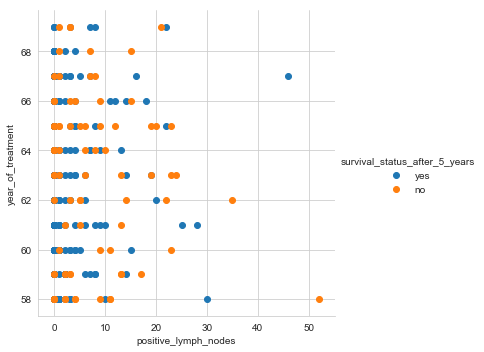

In [83]:
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='survival_status_after_5_years',size=5)\
   .map(plt.scatter, 'positive_lymph_nodes','year_of_treatment')\
   .add_legend()
plt.show()

## Pair-plot

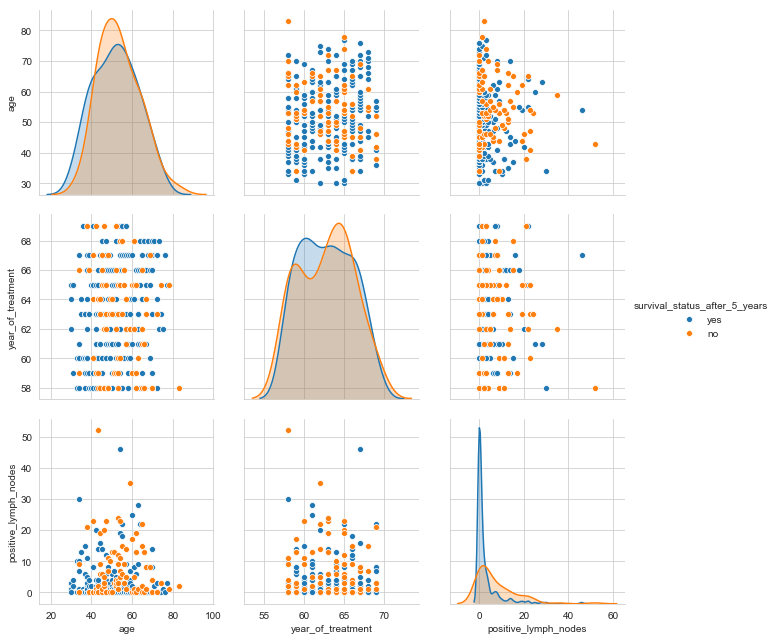

In [71]:
plt.close() 
sns.set_style("whitegrid");
sns.pairplot(data, hue="survival_status_after_5_years", size=3);
plt.show()

### Observation:
1. The pair-plots are not helpful.

## Histogram, PDF, CDF

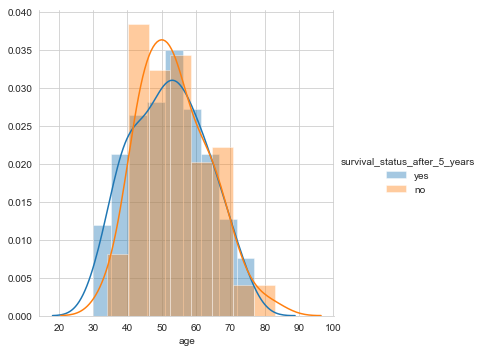

In [72]:
sns.FacetGrid(data, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, 'age') \
   .add_legend();
plt.show();

### Observation:
1. Since both the histogram of survival status overlap each other therefore we cannot classify
the status of survival based on age.

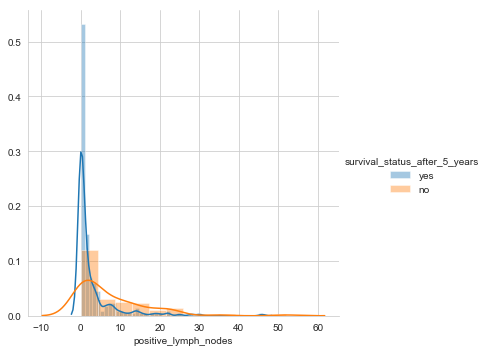

In [73]:
sns.FacetGrid(data, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, 'positive_lymph_nodes') \
   .add_legend();
plt.show();

### Observation:
1. Since both the histogram of survival status overlap each other therefore we cannot classify
the status of survival based on number of positive lymph nodes.
2. But the classification is much better lymph node than age
3. Since the two PDF's are right skewed we can say that the pdf of number of positive lymph nodes follows a positive or right skewed distribution.

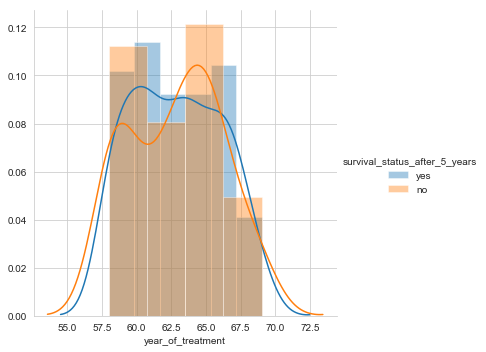

In [74]:
sns.FacetGrid(data, hue="survival_status_after_5_years", size=5) \
   .map(sns.distplot, 'year_of_treatment') \
   .add_legend();
plt.show();

### Observation:
1. Since both the histogram of survival status overlap each other therefore we cannot classify
the status of survival based on year of treatment.
2. Positive lymph nodes gives the best choice for classification, although its very difficult to classify even with that

## Mean, Std, Median, MAD

Calculation shown only for positive lymph nodes

In [80]:
import numpy as np
data_yes = data.loc[data["survival_status_after_5_years"] == "yes"];
data_no = data.loc[data["survival_status_after_5_years"] == "no"];

In [84]:
print("Means and standard deviation for patients surviving after 5 years:")
print(" The mean of number of positive lymph notes is {} with associated std of {}".format(np.mean(data_yes["positive_lymph_nodes"]),np.std(data_yes["positive_lymph_nodes"])))

Means and standard deviation for patients surviving after 5 years:
 The mean of number of positive lymph notes is 2.7911111111111113 with associated std of 5.857258449412131


In [85]:
print("Means and standard deviation for patients NOT surviving after 5 years:")
print(" The mean of number of positive lymph notes is {} with associated std of {}".format(np.mean(data_no["positive_lymph_nodes"]),np.std(data_no["positive_lymph_nodes"])))

Means and standard deviation for patients NOT surviving after 5 years:
 The mean of number of positive lymph notes is 7.45679012345679 with associated std of 9.128776076761632


In [86]:
print("\nMedian for positive lymph node for patients surviving after 5 years:")
print(np.median(data_yes["positive_lymph_nodes"]))


Median for positive lymph node for patients surviving after 5 years:
0.0


In [87]:
print("\nMedian for positive lymph node for patients surviving NOT after 5 years:")
print(np.median(data_no["positive_lymph_nodes"]))


Median for positive lymph node for patients surviving NOT after 5 years:
4.0


In [88]:
from statsmodels import robust
print("\nMad for positive lymph node for patients surviving after 5 years::")
print(robust.mad(data_yes["positive_lymph_nodes"]))


Mad for positive lymph node for patients surviving after 5 years::
0.0


In [89]:
from statsmodels import robust
print("\nMad for positive lymph node for patients NOT surviving after 5 years::")
print(robust.mad(data_no["positive_lymph_nodes"]))


Mad for positive lymph node for patients NOT surviving after 5 years::
5.930408874022408


### Observation from mean and median values:
1. Since the median is less than mean for number of positive lymph notes we can say that the 
distribution is right tailed or skewed as can also be seen in the histogram.
2. Median is a better choice to give central tendency in this case

### Five number summary of number of positive lymph nodes

In [91]:
print("\nQuantiles:")
print(np.percentile(data_yes["positive_lymph_nodes"],np.arange(0, 101, 25)))
print(np.percentile(data_no["positive_lymph_nodes"],np.arange(0, 101, 25)))



Quantiles:
[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]


In [102]:
print("\n90th Percentiles:")
print(np.percentile(data_yes["positive_lymph_nodes"],90))
print(np.percentile(data_no["positive_lymph_nodes"],90))


90th Percentiles:
8.0
20.0


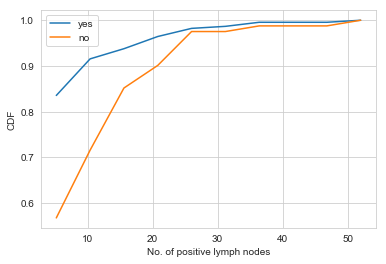

In [101]:
counts1, bin_edges = np.histogram(data_yes['positive_lymph_nodes'], bins=10, 
                                 density = True)
counts2, bin_edges = np.histogram(data_no['positive_lymph_nodes'], bins=10, 
                                 density = True)
pdf1 = counts1/(sum(counts1))
pdf2 = counts2/(sum(counts2))


#compute CDF
cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges[1:], cdf1,label='yes')
plt.plot(bin_edges[1:], cdf2,label='no')
plt.legend()
plt.xlabel('No. of positive lymph nodes')
plt.ylabel('CDF')
plt.show()

### Observation from Quantiles and CDF of number of lymph notes:
1. 75 % of patients who survived after 5 years had lymph nodes less than or equal to 3 whereas
2. 75% of patients who did not survive after 5 years of operation had less than or equal to 11 nodes.
3. 90% of patients who survived after 5 years had lymph nodes less than or equal to 8.
4. 90% of patients who did not survive after 5 years had lymph nodes less than or equal to 20


## Box Plot and Voilen plot

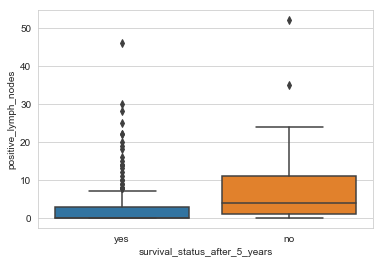

In [103]:
sns.boxplot(x='survival_status_after_5_years',y='positive_lymph_nodes', data=data)
plt.show()

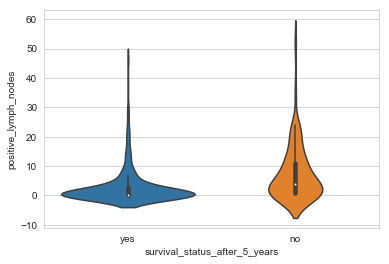

In [104]:
sns.violinplot(x="survival_status_after_5_years", y="positive_lymph_nodes", data=data, size=8)
plt.show()

## Conclusions
1. This data is imbalanced data
2. The scatter plot and the pair plot do not help in the classification of patient based on survival after 5 years of treatment.
3. The best feature choice based on scatter, pair and histogram is the number of positive nodes to classify the patient. 
4. The number of positive nodes follows a pdf which is right skewed and therefore median is a better measure of central tendency and MAD is a better measure of spread.
5. Using the quantiles we are able to conclude than 90% of patients who survived after 5 years had lymph nodes less than or equal to 8 whereas 90% of patients who did not survive after 5 years had lymph nodes less than or equal to 20
